# h2o AutoML 실습 with python

201130

wygo

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
import time

In [2]:
## h2o는 자바를 사용하므로 아래를 설치해야 한다, 근데 최신 15버전은 안된다! 아래 url의 11버전으로 설치하자
# https://www.oracle.com/java/technologies/javase-jdk11-downloads.html

In [3]:
#### 1. h2o 분석 준비하기 ####
# window 경우 java jdk를 설치해야 할수도 있음
# 최신 java 15ver는 호환 안됨, (Only Java versions 8-14)
import h2o
from h2o.automl import H2OAutoML
from h2o.estimators.gbm import H2OGradientBoostingEstimator
%matplotlib inline
h2o.init()
h2o.no_progress()
# H2O 클러스터 가동 시간, 시간대, 버전, 버전 수명, 클러스터 이름, 할당 된 하드웨어 리소스 (노드 수, 메모리, 코어 수), 연결 URL, 노출 된 H2O API 확장 및 사용 된 파이썬 버전과 같은 추가 정보가 출력

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM 18.9 (build 11.0.9+7-LTS, mixed mode)
  Starting server from C:\Users\go\.conda\envs\venv\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\go\AppData\Local\Temp\tmpslwioj1g
  JVM stdout: C:\Users\go\AppData\Local\Temp\tmpslwioj1g\h2o_go_started_from_python.out
  JVM stderr: C:\Users\go\AppData\Local\Temp\tmpslwioj1g\h2o_go_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,06 secs
H2O_cluster_timezone:,Asia/Seoul
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.0.2
H2O_cluster_version_age:,13 days
H2O_cluster_name:,H2O_from_python_go_nph2ae
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.979 Gb
H2O_cluster_total_cores:,0
H2O_cluster_allowed_cores:,0
H2O_cluster_status:,"accepting new members, healthy"


In [4]:
#### 2. 데이터 불러오기 ####
data_df = pd.read_csv('data.csv')
data_df.head()

,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10,...,var94,var95,var96,var97,var98,var99,var100,var101,var102,var103
0,1,55,60,63,64,62,57,65,57,61,...,1,54.49,38.18,60.32,56.32,50.24,58.71,55.50,60.18,42.19
1,1,57,56,71,66,71,62,69,59,66,...,2,51.46,16.58,47.86,46.52,44.65,40.47,48.54,57.96,46.44
2,1,57,56,59,49,58,61,64,55,61,...,6,51.46,33.16,56.17,61.23,50.24,62.36,55.50,60.18,46.44
3,1,47,39,59,55,69,48,57,46,61,...,4,57.51,48.22,56.17,58.78,53.97,51.41,62.46,51.29,46.44
4,1,65,56,49,43,58,46,68,61,68,...,1,63.57,33.16,60.32,58.78,50.24,58.71,41.58,51.29,37.94


In [5]:
# 데이터 확인
data_df.describe()

,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10,...,var94,var95,var96,var97,var98,var99,var100,var101,var102,var103
count,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,...,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000
mean,0.634921,50.841270,49.936508,54.650794,53.396825,58.952381,49.079365,57.222222,52.507937,58.555556,...,3.206349,52.087302,33.910952,51.533016,55.079524,47.519365,52.973968,53.872381,47.797619,42.293175
std,0.485320,10.199947,11.402989,9.974417,10.065174,11.141941,8.559661,13.228079,9.884613,10.594852,...,2.118724,11.821307,16.492683,10.333614,7.070471,9.659263,10.950102,8.883117,8.779146,7.550588
min,0.000000,27.000000,26.000000,36.000000,28.000000,31.000000,32.000000,28.000000,27.000000,32.000000,...,0.000000,12.120000,16.580000,9.390000,31.810000,13.010000,14.760000,15.570000,29.060000,14.720000
25%,0.000000,45.000000,41.000000,49.000000,47.000000,48.000000,43.000000,48.000000,47.000000,51.500000,...,1.000000,45.410000,16.580000,47.860000,51.420000,41.850000,47.760000,48.540000,40.180000,37.940000
50%,1.000000,51.000000,51.000000,55.000000,53.000000,58.000000,50.000000,57.000000,55.000000,61.000000,...,3.000000,51.460000,33.160000,52.010000,56.320000,48.380000,55.060000,55.500000,49.070000,42.190000
75%,1.000000,57.000000,58.000000,61.500000,61.000000,69.000000,57.000000,68.000000,60.000000,66.000000,...,5.000000,62.055000,43.200000,60.320000,61.230000,53.970000,62.360000,58.980000,53.510000,46.440000
max,1.000000,69.000000,72.000000,74.000000,70.000000,77.000000,63.000000,80.000000,73.000000,76.000000,...,7.000000,66.590000,68.290000,64.480000,63.680000,63.290000,69.660000,65.950000,64.620000,59.180000


In [6]:
# var2~는 입력 feature
feature = data_df.drop('var1', axis=1)
feature.describe()

,var2,var3,var4,var5,var6,var7,var8,var9,var10,var11,...,var94,var95,var96,var97,var98,var99,var100,var101,var102,var103
count,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,...,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000
mean,50.841270,49.936508,54.650794,53.396825,58.952381,49.079365,57.222222,52.507937,58.555556,51.730159,...,3.206349,52.087302,33.910952,51.533016,55.079524,47.519365,52.973968,53.872381,47.797619,42.293175
std,10.199947,11.402989,9.974417,10.065174,11.141941,8.559661,13.228079,9.884613,10.594852,11.673248,...,2.118724,11.821307,16.492683,10.333614,7.070471,9.659263,10.950102,8.883117,8.779146,7.550588
min,27.000000,26.000000,36.000000,28.000000,31.000000,32.000000,28.000000,27.000000,32.000000,24.000000,...,0.000000,12.120000,16.580000,9.390000,31.810000,13.010000,14.760000,15.570000,29.060000,14.720000
25%,45.000000,41.000000,49.000000,47.000000,48.000000,43.000000,48.000000,47.000000,51.500000,45.000000,...,1.000000,45.410000,16.580000,47.860000,51.420000,41.850000,47.760000,48.540000,40.180000,37.940000
50%,51.000000,51.000000,55.000000,53.000000,58.000000,50.000000,57.000000,55.000000,61.000000,51.000000,...,3.000000,51.460000,33.160000,52.010000,56.320000,48.380000,55.060000,55.500000,49.070000,42.190000
75%,57.000000,58.000000,61.500000,61.000000,69.000000,57.000000,68.000000,60.000000,66.000000,58.500000,...,5.000000,62.055000,43.200000,60.320000,61.230000,53.970000,62.360000,58.980000,53.510000,46.440000
max,69.000000,72.000000,74.000000,70.000000,77.000000,63.000000,80.000000,73.000000,76.000000,73.000000,...,7.000000,66.590000,68.290000,64.480000,63.680000,63.290000,69.660000,65.950000,64.620000,59.180000


In [7]:
# var1은 label
label = data_df['var1']
label.describe()

count    63.000000
mean      0.634921
std       0.485320
min       0.000000
25%       0.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: var1, dtype: float64

# AutoML 시작!!

In [8]:
max_runtime_secs = 10

In [9]:
%%time
list_model_id, list_accuracy, list_precision, list_recall, list_F1, list_auc, list_variable_importance = [], [], [], [], [], [], []  # for save ,metric
epoch = 1
for j in range(epoch, 1+1):
    print(j)
    ################################################################
    ## make dataset
    # Identify the response and set of predictors
    y = "var1"
    x = list(data_df.columns)  #if x is defined as all columns except the response, then x is not required
    x.remove(y)

    # data_df을 8:2로 나눈다, 50 : 13
    train, valid = train_test_split(data_df,
                                    test_size=0.2, 
                                    shuffle=True)
    h2o_train = h2o.H2OFrame(train)
    h2o_valid = h2o.H2OFrame(valid)

    # For binary classification, response should be a factor
    h2o_train[y] = h2o_train[y].asfactor()
    h2o_valid[y] = h2o_valid[y].asfactor()
    
    ################################################################    
    ## Run AutoML for 120 seconds
    aml = H2OAutoML(max_runtime_secs=max_runtime_secs, exclude_algos =['XGBoost', 'StackedEnsemble'])
    aml.train(x = x, y = y, training_frame=h2o_train, leaderboard_frame=h2o_valid)
    ################################################################
    ## save metric
    # Print Leaderboard (ranked by xval metrics)
    leaderboard = aml.leaderboard
    performance = aml.leader.model_performance(h2o_valid)  # (Optional) Evaluate performance on a test set
    
    list_model_id.append(aml.leader.model_id)  # 최고 모델 명
    list_accuracy.append(performance.accuracy())  # 정확도
    list_precision.append(performance.precision())  # precision
    list_recall.append(performance.recall())  # recall
    list_F1.append(performance.F1())  # f1
    list_auc.append(performance.auc())  # auc
    list_variable_importance.append(aml.leader.varimp())  # 중요한 입력 변수

    print(j, list_accuracy, list_precision, list_recall, list_F1, list_auc)

1

19:30:45.653: Skipping training of model GBM_5_AutoML_20201130_193037 due to exception: water.exceptions.H2OModelBuilderIllegalArgumentException: Illegal argument(s) for GBM model: GBM_5_AutoML_20201130_193037.  Details: ERRR on field: _min_rows: The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 50.0.


1 [[[0.6491042101388614, 0.7692307692307693]]] [[[0.7213001427990462, 1.0]]] [[[0.6491042101388614, 1.0]]] [[[0.6491042101388614, 0.8235294117647058]]] [0.6904761904761906]
Wall time: 15.2 s


In [11]:
performance


ModelMetricsBinomialGLM: glm
** Reported on test data. **

MSE: 0.2600257098257507
RMSE: 0.509927161294386
LogLoss: 0.7142122206317011
Null degrees of freedom: 12
Residual degrees of freedom: -90
Null deviance: 18.762932151926485
Residual deviance: 18.569517736424228
AIC: 224.56951773642422
AUC: 0.6904761904761906
AUCPR: 0.7399772937500352
Gini: 0.38095238095238115

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.6491042101388614: 


,,0,1,Error,Rate
0,0,3.0,3.0,0.5,(3.0/6.0)
1,1,0.0,7.0,0.0,(0.0/7.0)
2,Total,3.0,10.0,0.2308,(3.0/13.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.649104,0.823529,9.0
1,max f2,0.649104,0.921053,9.0
2,max f0point5,0.649104,0.744681,9.0
3,max accuracy,0.649104,0.769231,9.0
4,max precision,0.721300,1.000000,0.0
5,max recall,0.649104,1.000000,9.0
6,max specificity,0.721300,1.000000,0.0
7,max absolute_mcc,0.649104,0.591608,9.0
8,max min_per_class_accuracy,0.676499,0.500000,6.0
9,max mean_per_class_accuracy,0.649104,0.750000,9.0



Gains/Lift Table: Avg response rate: 53.85 %, avg score: 67.40 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.076923,0.718883,1.857143,1.857143,1.0,0.721300,1.000000,0.721300,0.142857,0.142857,85.714286,85.714286,0.142857
1,2,0.076923,0.716466,0.000000,1.857143,0.0,0.000000,1.000000,0.721300,0.000000,0.142857,-100.000000,85.714286,0.142857
2,3,0.076923,0.714049,0.000000,1.857143,0.0,0.000000,1.000000,0.721300,0.000000,0.142857,-100.000000,85.714286,0.142857
3,4,0.076923,0.711632,0.000000,1.857143,0.0,0.000000,1.000000,0.721300,0.000000,0.142857,-100.000000,85.714286,0.142857
4,5,0.076923,0.709214,0.000000,1.857143,0.0,0.000000,1.000000,0.721300,0.000000,0.142857,-100.000000,85.714286,0.142857
5,6,0.153846,0.700429,1.857143,1.857143,1.0,0.701157,1.000000,0.711229,0.142857,0.285714,85.714286,85.714286,0.285714
6,7,0.153846,0.698243,0.000000,1.857143,0.0,0.000000,1.000000,0.711229,0.000000,0.285714,-100.000000,85.714286,0.285714
7,8,0.230769,0.697205,0.000000,1.238095,0.0,0.697515,0.666667,0.706657,0.000000,0.285714,-100.000000,23.809524,0.119048
8,9,0.307692,0.687006,1.857143,1.392857,1.0,0.696740,0.750000,0.704178,0.142857,0.428571,85.714286,39.285714,0.261905
9,10,0.384615,0.677780,0.000000,1.114286,0.0,0.680517,0.600000,0.699446,0.000000,0.428571,-100.000000,11.428571,0.095238


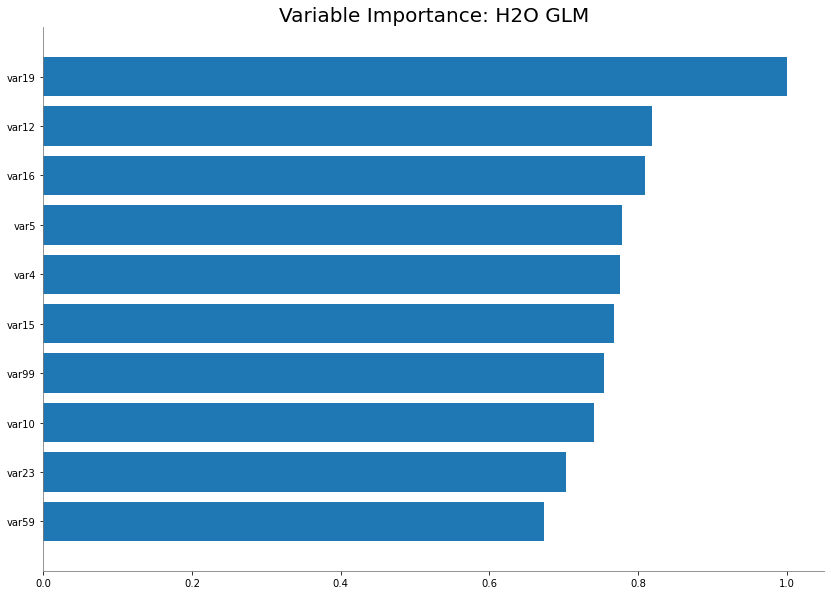

In [10]:
## 중요 변수 시각화
aml.leader.varimp_plot()

In [22]:
## automl 결과 확인
# Get AutoML object by `project_name`
get_aml = h2o.automl.get_automl(aml.project_name)
# Predict with top model from AutoML Leaderboard on a H2OFrame called 'test'
label_predicted = get_aml.predict(h2o_valid)
print(label_predicted['predict'])
print(h2o_valid['var1'])

predict
1
1
1
1
1
1
1
1
1
1


var1
0
0
1
0
1
0
1
1
1
0
